# Individual users

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import json
import seaborn as sns
import matplotlib.pyplot as plt
import string

In [2]:
df = pd.read_json('data/customers_final.json', lines=True)
df = df[df.total_votes > 5]

In [3]:
df = df.dropna()

df['helpfulness'] = (df.helpful_votes / df.total_votes).round(2)
df['helpful'] = df.helpfulness > 0.8

df['review_length'] = df['review_body'].apply(len)
df = df[df.review_length <= 5000]
df.head(1)

,customer_id,helpful_votes,product_category,product_id,review_body,review_date,review_id,star_rating,total_votes,verified_purchase,helpfulness,helpful,review_length
0,6935058,50,Mobile_Apps,B00HBWVVN0,Awesome!,2015-08-11,R1QTCWCGNJVJA0,3,71,Y,0.7,False,8


#### Stats

In [5]:
# count: 
print("total count")
print(df.customer_id.count())

# Num helpful:
print("\nhelpful count")
print(df[df['helpful'] == True].customer_id.count())

# Num not helpful: 
print("\nnot helpful count")
print(df[df['helpful'] == False].customer_id.count())

# average helpfulness score:
print("\naverage helpfulness")
print(df.helpfulness.mean())

# average length of helpful review
print("\naverage length of helpful review")
print(df[df.helpful == True].review_length.mean())

#  average length of not helpful review
print("\naverage length of not helpful review")
print(df[df.helpful == False].review_length.mean())

total count
219566

helpful count
166681

not helpful count
52885

average helpfulness
0.8271020558741954

average length of helpful review
1952.7827826806895

average length of not helpful review
1573.249579275787


#### Plots

In [22]:
df.customer_id.value_counts(ascending=False).head(10)

50122160    1103
50881246     624
52496677     584
52500542     520
52615377     468
13161706     443
50199793     388
44834233     385
50732546     385
50913245     374
Name: customer_id, dtype: int64

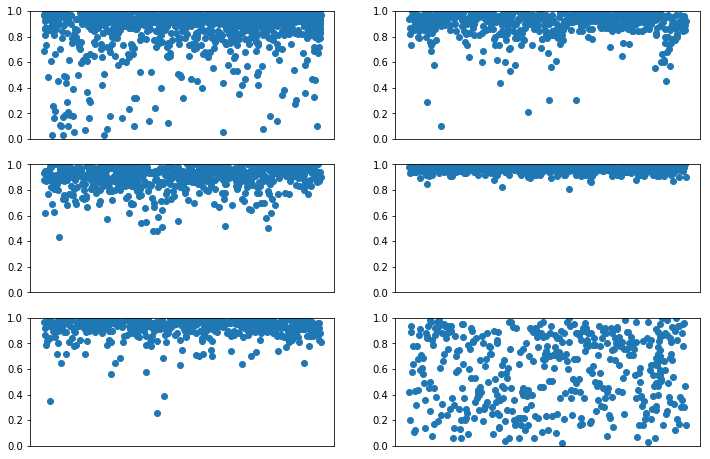

In [34]:
df_1 = df[df.customer_id == 50122160]
df_2 = df[df.customer_id == 50881246]
df_3 = df[df.customer_id == 52496677]
df_4 = df[df.customer_id == 52500542]
df_5 = df[df.customer_id == 52615377]
df_6 = df[df.customer_id == 13161706]
df_7 = df[df.customer_id == 50199793]
df_8 = df[df.customer_id == 44834233]
df_9 = df[df.customer_id == 50732546]
df_10 = df[df.customer_id == 50913245]

gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (1, 0))
ax3 = plt.subplot2grid(gridsize, (0, 1))
ax4 = plt.subplot2grid(gridsize, (1, 1))
ax5 = plt.subplot2grid(gridsize, (2, 0))
ax6 = plt.subplot2grid(gridsize, (2, 1))

for ax in (ax1, ax2, ax3, ax4, ax5, ax6):
    ax.set_xticks([])
    ax.set_ylim(0, 1)

sctr = ax1.scatter(x = df_1.review_date, y = df_1.helpfulness)
sctr = ax2.scatter(x = df_2.review_date, y = df_2.helpfulness)
sctr = ax3.scatter(x = df_3.review_date, y = df_3.helpfulness)
sctr = ax4.scatter(x = df_4.review_date, y = df_4.helpfulness)
sctr = ax5.scatter(x = df_5.review_date, y = df_5.helpfulness)
sctr = ax6.scatter(x = df_6.review_date, y = df_6.helpfulness)